In [19]:
import os
import random
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
DATASET_DIR = "/kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam"

In [20]:
classes = sorted(os.listdir(DATASET_DIR))

print("Classes found:")
for cls in classes:
    print("-", cls)

image_counts = {}

for cls in classes:
    class_path = os.path.join(DATASET_DIR, cls)
    if os.path.isdir(class_path):
        image_counts[cls] = len(os.listdir(class_path))

image_counts

Classes found:
- asteroid
- black hole
- comet
- constellation
- galaxy
- nebula
- planet
- star


{'asteroid': 283,
 'black hole': 656,
 'comet': 416,
 'constellation': 1552,
 'galaxy': 3984,
 'nebula': 1192,
 'planet': 1472,
 'star': 3269}

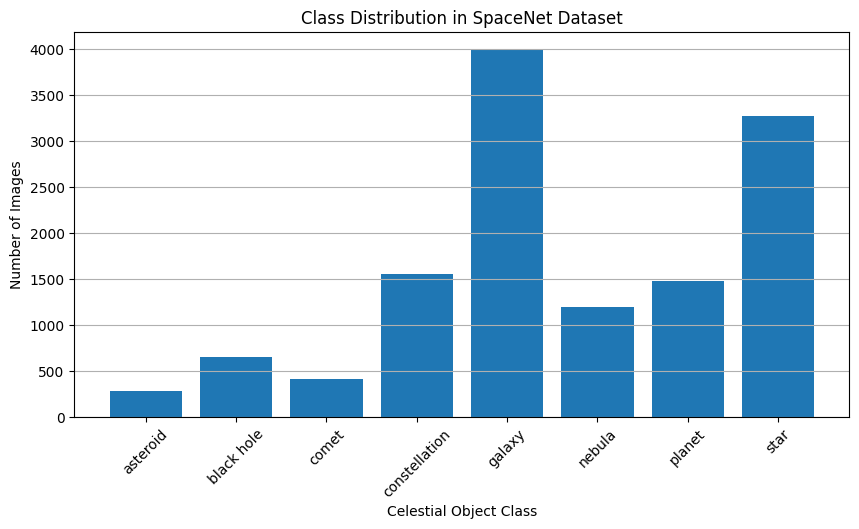

In [21]:
plt.figure(figsize=(10, 5))
plt.bar(image_counts.keys(), image_counts.values())
plt.title("Class Distribution in SpaceNet Dataset")
plt.xlabel("Celestial Object Class")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

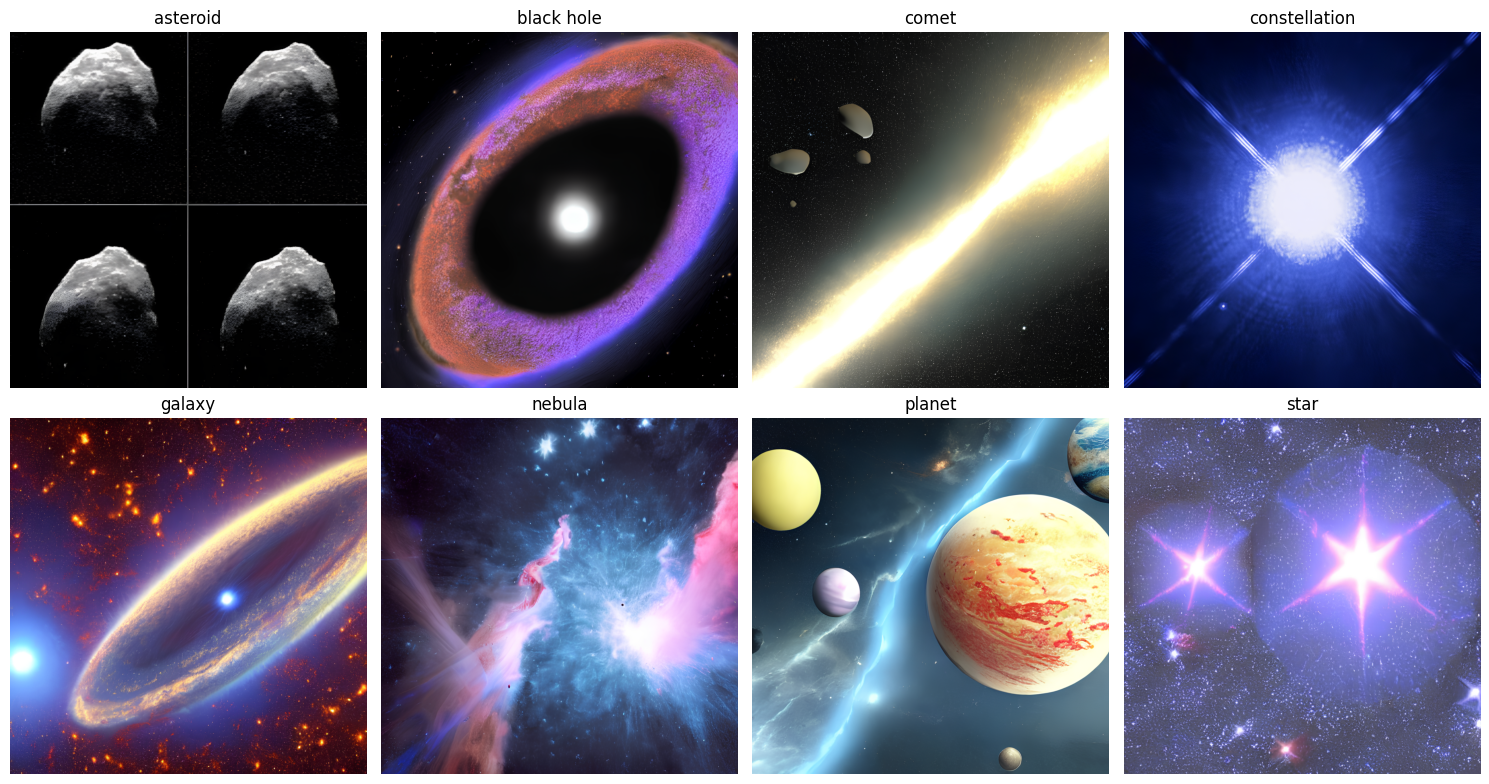

In [6]:
plt.figure(figsize=(15, 8))

for i, cls in enumerate(classes):
    class_path = os.path.join(DATASET_DIR, cls)
    images = os.listdir(class_path)
    
    img_name = random.choice(images)
    img_path = os.path.join(class_path, img_name)
    
    img = Image.open(img_path)
    
    plt.subplot(2, (len(classes)+1)//2, i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(cls)

plt.tight_layout()
plt.show()

In [15]:
from PIL import Image, UnidentifiedImageError

resolutions = []
formats = []
channels = []
corrupted_images = []

for cls in classes:
    class_path = os.path.join(DATASET_DIR, cls)
    images = os.listdir(class_path)
    
    for img_name in images[:50]: 
        img_path = os.path.join(class_path, img_name)
        
        try:
            with Image.open(img_path) as img:
                resolutions.append(img.size)     
                formats.append(img.format)
                channels.append(len(img.getbands()))
        
        except (UnidentifiedImageError, OSError) as e:
            corrupted_images.append(img_path)
            continue

In [16]:
print(f"Total corrupted/unreadable images found: {len(corrupted_images)}")

Total corrupted/unreadable images found: 15


In [17]:
res_df = pd.DataFrame(resolutions, columns=["Width", "Height"])
res_df.describe()

,Width,Height
count,385.0,385.0
mean,2048.0,2048.0
std,0.0,0.0
min,2048.0,2048.0
25%,2048.0,2048.0
50%,2048.0,2048.0
75%,2048.0,2048.0
max,2048.0,2048.0


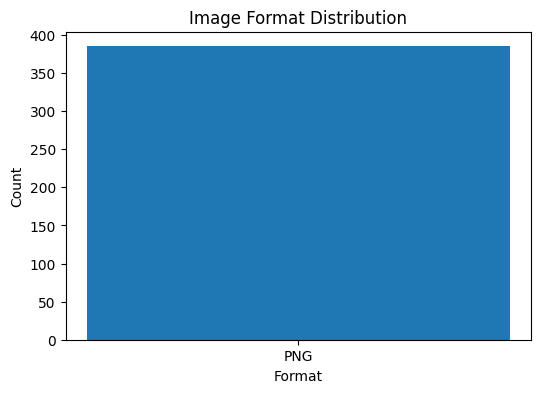

In [11]:
format_counts = Counter(formats)

plt.figure(figsize=(6, 4))
plt.bar(format_counts.keys(), format_counts.values())
plt.title("Image Format Distribution")
plt.xlabel("Format")
plt.ylabel("Count")
plt.show()


In [18]:
channel_counts = Counter(channels)
channel_counts

Counter({3: 385})

**Key Observations**

- The dataset contains 8 distinct celestial object classes suitable for multi-class classification.
- The dataset is imbalanced, with galaxy and star classes dominating the sample count.
- All images have a uniform resolution of 2048×2048 pixels, simplifying preprocessing.
- Images are consistently PNG format with 3-channel RGB color.
- Visual samples show clear class-specific patterns, favorable for deep learning models.